In [1]:
from google.colab import drive
drive.mount('/content/drive')
project_path = "/content/drive/My Drive/OptionsTrading/"

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(project_path+"SPX_16Yrs_EOD.csv")

In [4]:
data.head(5)

,time,open,high,low,close,Volume
0,1246282200,919.86,927.99,916.18,927.23,4211760000
1,1246368600,927.15,930.01,912.86,919.32,4627570000
2,1246455000,920.82,931.92,920.82,923.33,3919400000
3,1246541400,921.24,921.24,896.42,896.42,3931000000
4,1246887000,894.27,898.72,886.36,898.72,4712580000


In [5]:
data['Open_to_High_%'] = abs(((data['high'] - data['open']) / data['open']) * 100)
data['Open_to_Low_%'] = abs(((data['low'] - data['open']) / data['open']) * 100)
data['High_to_Low_%'] = abs(((data['low'] - data['high']) / data['high']) * 100)
data['Open_to_Close_%'] = abs(((data['close'] - data['open']) / data['open']) * 100)

In [6]:
data.head(2)

,time,open,high,low,close,Volume,Open_to_High_%,Open_to_Low_%,High_to_Low_%,Open_to_Close_%
0,1246282200,919.86,927.99,916.18,927.23,4211760000,0.883830,0.400061,1.272643,0.801209
1,1246368600,927.15,930.01,912.86,919.32,4627570000,0.308472,1.541282,1.844066,0.844524


In [7]:
data['date_column'] = pd.to_datetime(data['time'], unit='s').dt.date

In [8]:
data.head(2)

,time,open,high,low,close,Volume,Open_to_High_%,Open_to_Low_%,High_to_Low_%,Open_to_Close_%,date_column
0,1246282200,919.86,927.99,916.18,927.23,4211760000,0.883830,0.400061,1.272643,0.801209,2009-06-29
1,1246368600,927.15,930.01,912.86,919.32,4627570000,0.308472,1.541282,1.844066,0.844524,2009-06-30


In [54]:
data.shape

(3934, 13)

In [9]:
data.drop(columns=['time', 'Volume'], inplace=True)

In [10]:
data.describe()

,open,high,low,close,Open_to_High_%,Open_to_Low_%,High_to_Low_%,Open_to_Close_%
count,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000
mean,2696.894329,2711.258701,2681.568167,2697.503541,0.546404,0.577412,1.115410,0.625949
std,1307.753118,1314.226623,1300.859380,1307.867310,0.578737,0.688454,0.774787,0.657368
min,879.570000,883.570000,869.320000,879.130000,0.000000,0.000000,0.145534,0.000000
25%,1624.782500,1632.247500,1614.335000,1626.002500,0.152757,0.118308,0.608289,0.179769
50%,2376.735000,2385.290000,2364.275000,2374.730000,0.384150,0.367856,0.916076,0.426499
75%,3802.077500,3831.767500,3764.647500,3800.805000,0.765188,0.769837,1.376971,0.855991
max,6121.430000,6128.180000,6107.620000,6118.720000,5.795951,8.467167,8.718032,6.593352


In [11]:
df = data

<ipython-input-12-666218fb514d>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_bucket_percentages.index, y=high_bucket_percentages.values, palette=bar_colors, ax=axes[0])


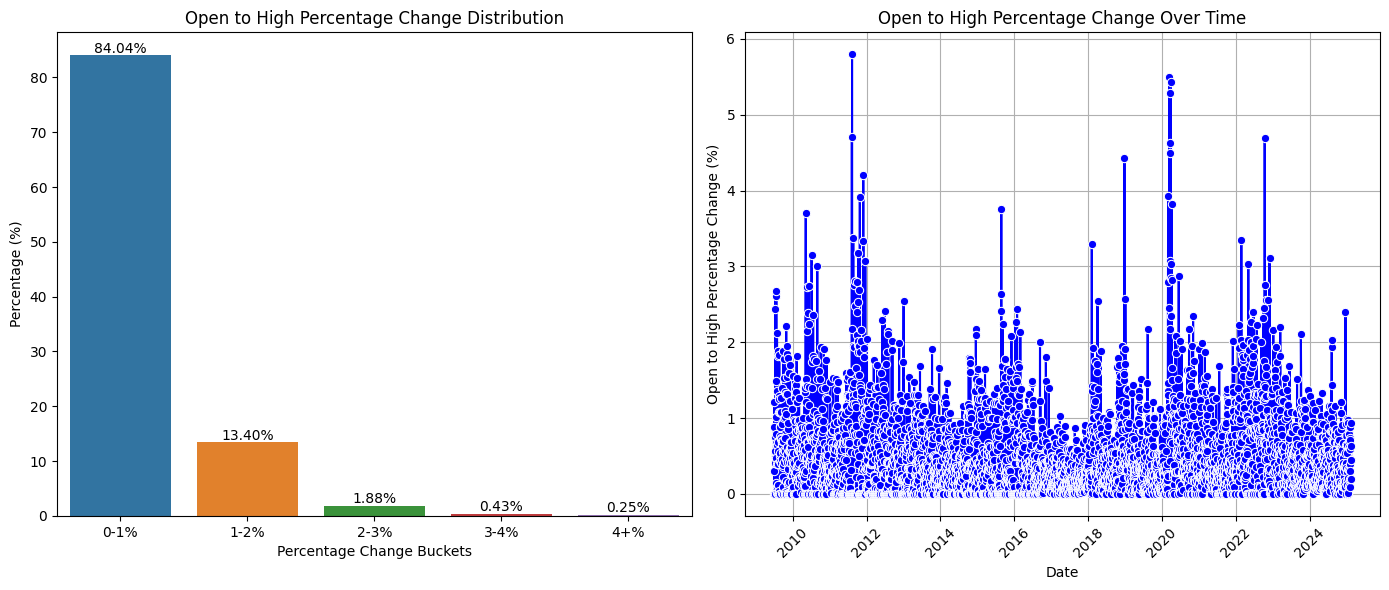

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defining bucket ranges and labels for Open_to_High_%
bins = [0, 1, 2, 3, 4, float("inf")]
labels = ["0-1%", "1-2%", "2-3%", "3-4%", "4+%"]

bar_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Categorizing Open_to_High_% into buckets
df["Open_to_High_Bucket"] = pd.cut(df["Open_to_High_%"], bins=bins, labels=labels, include_lowest=True)

# Counting occurrences in each bucket
high_bucket_counts = df["Open_to_High_Bucket"].value_counts().sort_index()

# Calculating percentage distribution
total_high = high_bucket_counts.sum()
high_bucket_percentages = (high_bucket_counts / total_high) * 100

# Creating a side-by-side layout for the two graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Open_to_High_% Distribution
sns.barplot(x=high_bucket_percentages.index, y=high_bucket_percentages.values, palette=bar_colors, ax=axes[0])
axes[0].set_xlabel("Percentage Change Buckets")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_title("Open to High Percentage Change Distribution")

# Show percentage values on bars
for i, v in enumerate(high_bucket_percentages.values):
    axes[0].text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

# Line plot for Open_to_High_% vs Date
sns.lineplot(x=df["date_column"], y=df["Open_to_High_%"], marker="o", color="blue", ax=axes[1])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Open to High Percentage Change (%)")
axes[1].set_title("Open to High Percentage Change Over Time")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and display the charts
plt.tight_layout()
plt.show()


<ipython-input-13-f9288e4e4326>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=low_bucket_percentages.index, y=low_bucket_percentages.values, palette=bar_colors, ax=axes[0])


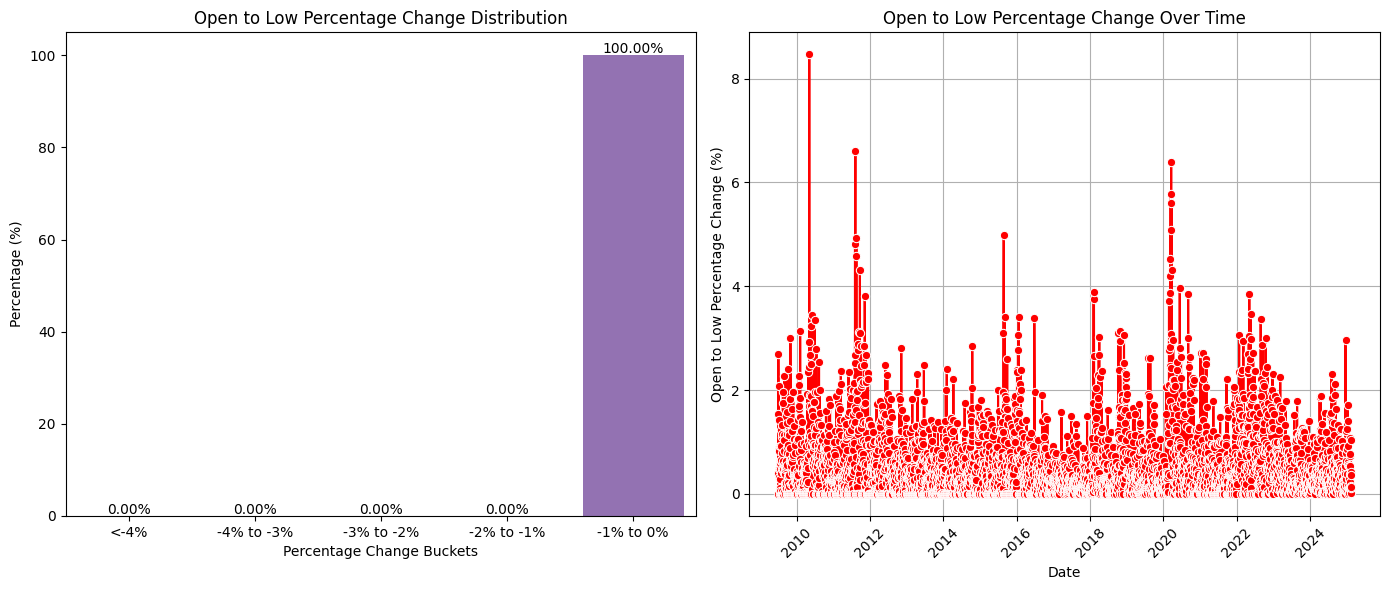

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace with actual data)
# df = pd.read_csv("your_data.csv")  # Load your dataset if not already loaded

# Defining bucket ranges and labels for Open_to_Low_%
bins = [-float("inf"), -4, -3, -2, -1, 0]  # Adjust the bin ranges as needed
labels = ["<-4%", "-4% to -3%", "-3% to -2%", "-2% to -1%", "-1% to 0%"]

bar_colors = ["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4", "#9467bd"]

# Categorizing Open_to_Low_% into buckets
df["Open_to_Low_Bucket"] = pd.cut(df["Open_to_Low_%"], bins=bins, labels=labels, include_lowest=True)

# Counting occurrences in each bucket
low_bucket_counts = df["Open_to_Low_Bucket"].value_counts().sort_index()

# Calculating percentage distribution
total_low = low_bucket_counts.sum()
low_bucket_percentages = (low_bucket_counts / total_low) * 100

# Creating a side-by-side layout for the two graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Open_to_Low_% Distribution
sns.barplot(x=low_bucket_percentages.index, y=low_bucket_percentages.values, palette=bar_colors, ax=axes[0])
axes[0].set_xlabel("Percentage Change Buckets")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_title("Open to Low Percentage Change Distribution")

# Show percentage values on bars
for i, v in enumerate(low_bucket_percentages.values):
    axes[0].text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

# Line plot for Open_to_Low_% vs Date
sns.lineplot(x=df["date_column"], y=df["Open_to_Low_%"], marker="o", color="red", ax=axes[1])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Open to Low Percentage Change (%)")
axes[1].set_title("Open to Low Percentage Change Over Time")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and display the charts
plt.tight_layout()
plt.show()


<ipython-input-14-6458d2765c9b>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=oc_bucket_percentages.index, y=oc_bucket_percentages.values, palette=bar_colors, ax=axes[0])


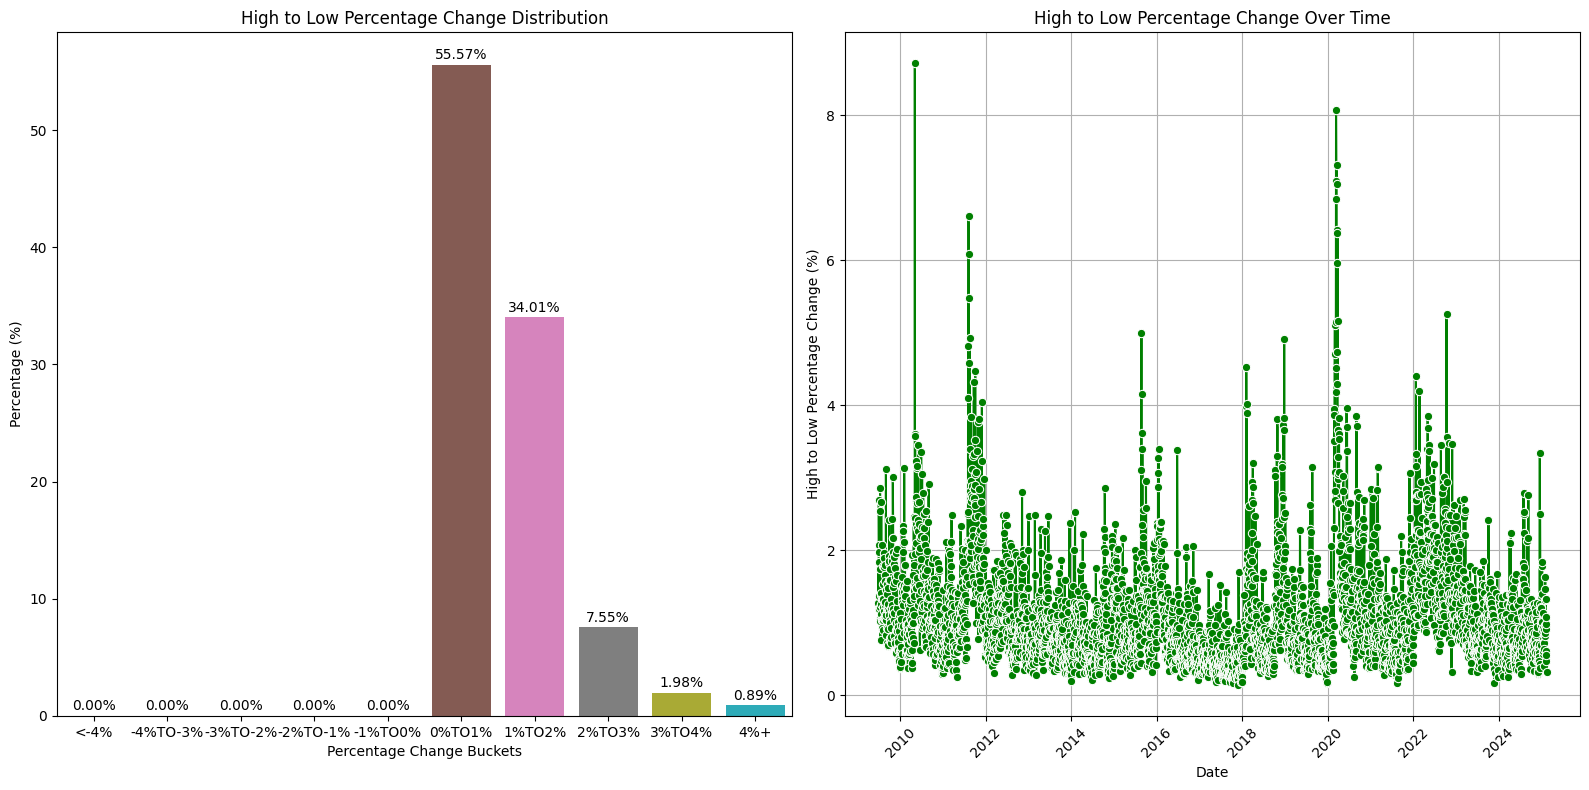

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace with actual data)
# df = pd.read_csv("your_data.csv")  # Load your dataset if not already loaded

# Define bucket ranges and labels for OHigh_to_Low__%
bins = [-float("inf"), -4, -3, -2, -1, 0, 1, 2, 3, 4, float("inf")]
labels = ["<-4%", "-4%TO-3%", "-3%TO-2%", "-2%TO-1%", "-1%TO0%",
          "0%TO1%", "1%TO2%", "2%TO3%", "3%TO4%", "4%+"]

bar_colors = ["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4", "#9467bd",
              "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Categorizing High_to_Low_% into buckets
df["High_to_Low_Bucket"] = pd.cut(df["High_to_Low_%"], bins=bins, labels=labels, include_lowest=True)

# Counting occurrences in each bucket
oc_bucket_counts = df["High_to_Low_Bucket"].value_counts().sort_index()

# Calculating percentage distribution
total_oc = oc_bucket_counts.sum()
oc_bucket_percentages = (oc_bucket_counts / total_oc) * 100

# Creating a side-by-side layout for the two graphs
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar plot for High_to_Low__% Distribution
sns.barplot(x=oc_bucket_percentages.index, y=oc_bucket_percentages.values, palette=bar_colors, ax=axes[0])
axes[0].set_xlabel("Percentage Change Buckets")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_title("High to Low Percentage Change Distribution")

# Show percentage values on bars
for i, v in enumerate(oc_bucket_percentages.values):
    axes[0].text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

# Line plot for High_to_Low__% vs Date
sns.lineplot(x=df["date_column"], y=df["High_to_Low_%"], marker="o", color="green", ax=axes[1])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("High to Low Percentage Change (%)")
axes[1].set_title("High to Low Percentage Change Over Time")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and display the charts
plt.tight_layout()
plt.show()


<ipython-input-15-16be91281854>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=oc_bucket_percentages.index, y=oc_bucket_percentages.values, palette=bar_colors, ax=axes[0])


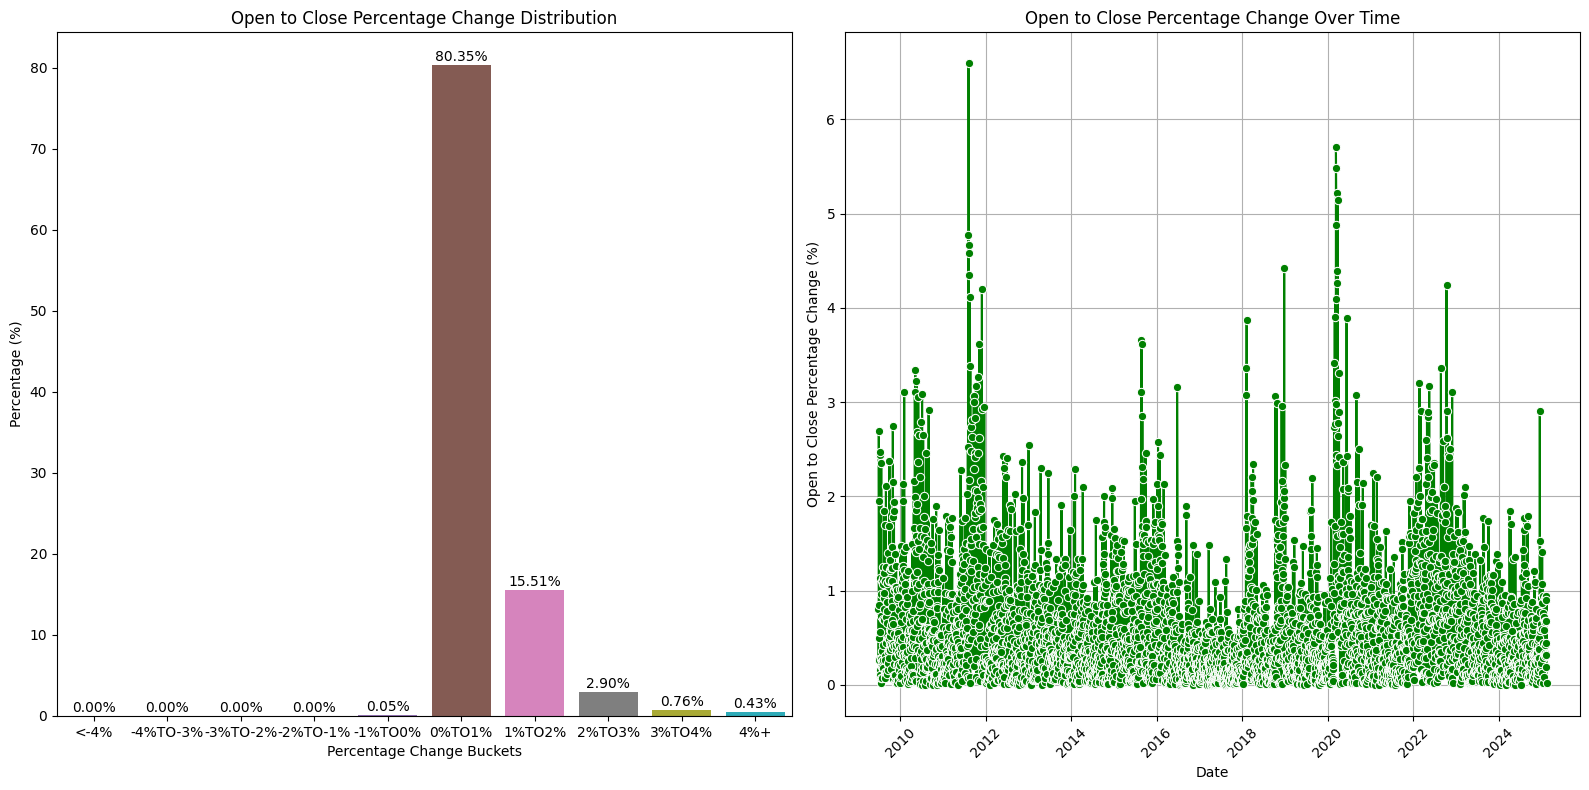

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace with actual data)
# df = pd.read_csv("your_data.csv")  # Load your dataset if not already loaded

# Define bucket ranges and labels for Open_to_Close_%
bins = [-float("inf"), -4, -3, -2, -1, 0, 1, 2, 3, 4, float("inf")]
labels = ["<-4%", "-4%TO-3%", "-3%TO-2%", "-2%TO-1%", "-1%TO0%",
          "0%TO1%", "1%TO2%", "2%TO3%", "3%TO4%", "4%+"]

bar_colors = ["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4", "#9467bd",
              "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Categorizing Open_to_Close_% into buckets
df["Open_to_Close_Bucket"] = pd.cut(df["Open_to_Close_%"], bins=bins, labels=labels, include_lowest=True)

# Counting occurrences in each bucket
oc_bucket_counts = df["Open_to_Close_Bucket"].value_counts().sort_index()

# Calculating percentage distribution
total_oc = oc_bucket_counts.sum()
oc_bucket_percentages = (oc_bucket_counts / total_oc) * 100

# Creating a side-by-side layout for the two graphs
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar plot for Open_to_Close_% Distribution
sns.barplot(x=oc_bucket_percentages.index, y=oc_bucket_percentages.values, palette=bar_colors, ax=axes[0])
axes[0].set_xlabel("Percentage Change Buckets")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_title("Open to Close Percentage Change Distribution")

# Show percentage values on bars
for i, v in enumerate(oc_bucket_percentages.values):
    axes[0].text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

# Line plot for Open_to_Close_% vs Date
sns.lineplot(x=df["date_column"], y=df["Open_to_Close_%"], marker="o", color="green", ax=axes[1])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Open to Close Percentage Change (%)")
axes[1].set_title("Open to Close Percentage Change Over Time")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and display the charts
plt.tight_layout()
plt.show()


In [16]:
vix_data = pd.read_csv(project_path+"VIX_EOD_2010.csv")

In [17]:
vix_data.head(2)

,time,open,high,low,close,Volume
0,1249283400,25.92,26.49001,25.56,25.56,NaN
1,1249369800,25.55,26.16000,24.89,24.89,NaN


In [18]:
vix_data['date_column'] = pd.to_datetime(vix_data['time'], unit='s').dt.date

In [19]:
vix_data.head(2)

,time,open,high,low,close,Volume,date_column
0,1249283400,25.92,26.49001,25.56,25.56,NaN,2009-08-03
1,1249369800,25.55,26.16000,24.89,24.89,NaN,2009-08-04


In [20]:
vix_data.drop(columns=['time', 'Volume'], inplace=True)

In [21]:
vix_data.head(2)

,open,high,low,close,date_column
0,25.92,26.49001,25.56,25.56,2009-08-03
1,25.55,26.16000,24.89,24.89,2009-08-04


In [22]:
vix_data.rename(columns={
    'open': 'open_vix',
    'high': 'high_vix',
    'low': 'low_vix',
    'close': 'close_vix'
}, inplace=True)

In [23]:
vix_data.head(2)

,open_vix,high_vix,low_vix,close_vix,date_column
0,25.92,26.49001,25.56,25.56,2009-08-03
1,25.55,26.16000,24.89,24.89,2009-08-04


In [24]:
merged_df = vix_data.merge(data, on='date_column', how='inner')

In [25]:
# merged_df.drop(columns=['Open_to_High_Bucket', 'Open_to_Low_Bucket', 'High_to_Low_Bucket', 'Open_to_Close_Bucket'], inplace=True)
merged_df.head(10)

,open_vix,high_vix,low_vix,close_vix,date_column,open,high,low,close,Open_to_High_%,Open_to_Low_%,High_to_Low_%,Open_to_Close_%,Open_to_High_Bucket,Open_to_Low_Bucket,High_to_Low_Bucket,Open_to_Close_Bucket
0,25.92000,26.49001,25.56000,25.56000,2009-08-03,990.22,1003.61,990.22,1002.63,1.352225,0.000000,1.334184,1.253257,1-2%,-1% to 0%,1%TO2%,1%TO2%
1,25.55000,26.16000,24.89000,24.89000,2009-08-04,1001.41,1007.12,996.68,1005.65,0.570196,0.472334,1.036619,0.423403,0-1%,NaN,1%TO2%,0%TO1%
2,24.91000,25.85001,24.85999,24.89999,2009-08-05,1005.41,1006.64,994.31,1002.72,0.122338,1.104027,1.224867,0.267553,0-1%,NaN,1%TO2%,0%TO1%
3,24.89999,26.14999,24.46999,25.67000,2009-08-06,1004.06,1008.00,992.49,997.08,0.392407,1.152322,1.538690,0.695178,0-1%,NaN,1%TO2%,0%TO1%
4,24.71001,24.95000,23.98000,24.75999,2009-08-07,999.83,1018.00,999.83,1010.48,1.817309,0.000000,1.784872,1.065181,1-2%,-1% to 0%,1%TO2%,1%TO2%
5,24.75999,25.82001,24.75999,24.98999,2009-08-10,1008.89,1010.12,1000.99,1007.10,0.121916,0.783039,0.903853,0.177423,0-1%,NaN,0%TO1%,0%TO1%
6,24.98000,26.98000,24.98000,25.98999,2009-08-11,1005.77,1005.77,992.40,994.35,0.000000,1.329330,1.329330,1.135448,0-1%,NaN,1%TO2%,1%TO2%
7,25.99001,26.50000,25.10999,25.45000,2009-08-12,994.00,1012.78,993.36,1005.81,1.889336,0.064386,1.917494,1.188129,1-2%,NaN,1%TO2%,1%TO2%
8,25.34000,26.14999,24.70999,24.70999,2009-08-13,1005.86,1012.78,1001.02,1012.73,0.687969,0.481180,1.161160,0.682998,0-1%,NaN,1%TO2%,0%TO1%
9,24.77000,25.94000,24.25999,24.26999,2009-08-14,1012.23,1012.60,994.60,1004.09,0.036553,1.741699,1.777602,0.804165,0-1%,NaN,1%TO2%,0%TO1%


In [26]:
len(merged_df)

3910

In [27]:
merged_df.describe()

,open_vix,high_vix,low_vix,close_vix,open,high,low,close,Open_to_High_%,Open_to_Low_%,High_to_Low_%,Open_to_Close_%
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,18.656102,19.636916,17.710606,18.511028,2707.729379,2722.132655,2692.350798,2708.323353,0.544455,0.576461,1.112560,0.624524
std,6.962148,7.619565,6.322929,6.913567,1304.401144,1310.878051,1297.518438,1304.536737,0.576523,0.688537,0.774847,0.655744
min,9.010000,9.310000,8.560000,9.140000,980.620000,991.200000,978.510000,979.730000,0.000000,0.000000,0.145534,0.000000
25%,13.832500,14.342500,13.290000,13.690000,1640.007500,1650.110000,1631.512500,1640.430000,0.151713,0.118086,0.606676,0.179400
50%,16.870000,17.705000,16.100010,16.770000,2389.340000,2394.620000,2379.940000,2388.470000,0.382969,0.366232,0.912070,0.425888
75%,21.740000,22.870000,20.677500,21.490008,3813.970000,3839.365000,3785.610000,3809.410000,0.763013,0.767276,1.374499,0.854110
max,82.690000,85.470000,70.370000,82.690000,6121.430000,6128.180000,6107.620000,6118.720000,5.795951,8.467167,8.718032,6.593352


In [28]:
mean_df = round(merged_df.groupby("Open_to_High_Bucket")["high_vix"].mean(), 2)

<ipython-input-28-2f623f1a3f32>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = round(merged_df.groupby("Open_to_High_Bucket")["high_vix"].mean(), 2)


In [29]:
round(merged_df.groupby("Open_to_High_Bucket")["high_vix"].std(), 2)

<ipython-input-29-7b53d593e54e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  round(merged_df.groupby("Open_to_High_Bucket")["high_vix"].std(), 2)


,high_vix
Open_to_High_Bucket,
0-1%,6.42
1-2%,7.84
2-3%,12.14
3-4%,15.30
4+%,19.69


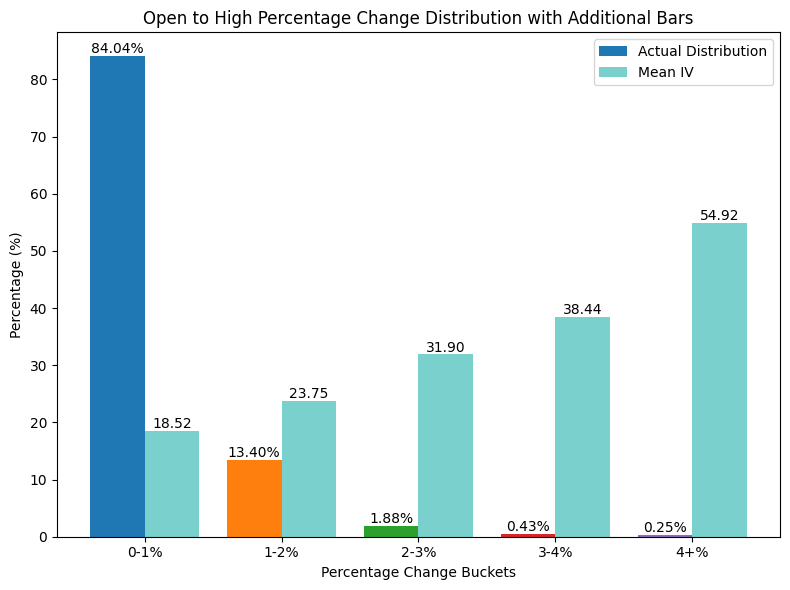

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Defining bucket ranges and labels for Open_to_High_%
bins = [0, 1, 2, 3, 4, float("inf")]
labels = ["0-1%", "1-2%", "2-3%", "3-4%", "4+%"]

bar_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Categorizing Open_to_High_% into buckets
df["Open_to_High_Bucket"] = pd.cut(df["Open_to_High_%"], bins=bins, labels=labels, include_lowest=True)

# Counting occurrences in each bucket
high_bucket_counts = df["Open_to_High_Bucket"].value_counts().sort_index()

# Calculating percentage distribution
total_high = high_bucket_counts.sum()
high_bucket_percentages = (high_bucket_counts / total_high) * 100

# Defining the given fixed values for each Open_to_High_Bucket
fixed_values_dict = mean_df

# Aligning fixed values with the bucket order
fixed_values = [fixed_values_dict[bucket] for bucket in high_bucket_percentages.index]

# Creating a grouped bar plot for Open_to_High_% Distribution with additional bars
fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.4  # Width of the bars
x_indexes = np.arange(len(high_bucket_percentages))  # X-axis positions

# Original percentage bars
ax.bar(x_indexes - bar_width/2, high_bucket_percentages.values, width=bar_width, color=bar_colors, label="Actual Distribution")

# Given fixed value bars
ax.bar(x_indexes + bar_width/2, fixed_values, width=bar_width, color="#20B2AA", alpha=0.6, label="Mean IV")

ax.set_xticks(x_indexes)
ax.set_xticklabels(high_bucket_percentages.index)
ax.set_xlabel("Percentage Change Buckets")
ax.set_ylabel("Percentage (%)")
ax.set_title("Open to High Percentage Change Distribution with Additional Bars")
ax.legend()

# Show percentage values on bars
for i, v in enumerate(high_bucket_percentages.values):
    ax.text(i - bar_width/2, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

for i, v in enumerate(fixed_values):
    ax.text(i + bar_width/2, v + 0.5, f"{v:.2f}", ha='center', fontsize=10)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


In [31]:
round(merged_df.groupby("Open_to_High_Bucket")["high_vix"].std(), 2)

<ipython-input-31-7b53d593e54e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  round(merged_df.groupby("Open_to_High_Bucket")["high_vix"].std(), 2)


,high_vix
Open_to_High_Bucket,
0-1%,6.42
1-2%,7.84
2-3%,12.14
3-4%,15.30
4+%,19.69


In [32]:
merged_df

,open_vix,high_vix,low_vix,close_vix,date_column,open,high,low,close,Open_to_High_%,Open_to_Low_%,High_to_Low_%,Open_to_Close_%,Open_to_High_Bucket,Open_to_Low_Bucket,High_to_Low_Bucket,Open_to_Close_Bucket
0,25.92000,26.49001,25.56000,25.56000,2009-08-03,990.22,1003.61,990.22,1002.63,1.352225,0.000000,1.334184,1.253257,1-2%,-1% to 0%,1%TO2%,1%TO2%
1,25.55000,26.16000,24.89000,24.89000,2009-08-04,1001.41,1007.12,996.68,1005.65,0.570196,0.472334,1.036619,0.423403,0-1%,NaN,1%TO2%,0%TO1%
2,24.91000,25.85001,24.85999,24.89999,2009-08-05,1005.41,1006.64,994.31,1002.72,0.122338,1.104027,1.224867,0.267553,0-1%,NaN,1%TO2%,0%TO1%
3,24.89999,26.14999,24.46999,25.67000,2009-08-06,1004.06,1008.00,992.49,997.08,0.392407,1.152322,1.538690,0.695178,0-1%,NaN,1%TO2%,0%TO1%
4,24.71001,24.95000,23.98000,24.75999,2009-08-07,999.83,1018.00,999.83,1010.48,1.817309,0.000000,1.784872,1.065181,1-2%,-1% to 0%,1%TO2%,1%TO2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,16.58000,16.61000,15.70000,15.80000,2025-02-10,6046.40,6073.38,6044.84,6066.45,0.446216,0.025800,0.469920,0.331602,0-1%,NaN,0%TO1%,0%TO1%
3906,16.13000,16.42000,15.75000,16.01000,2025-02-11,6049.32,6076.28,6042.34,6068.49,0.445670,0.115385,0.558565,0.316895,0-1%,NaN,0%TO1%,0%TO1%
3907,15.91000,17.18000,15.64000,15.88000,2025-02-12,6025.08,6063.00,6003.00,6051.98,0.629369,0.366468,0.989609,0.446467,0-1%,NaN,0%TO1%,0%TO1%
3908,15.97000,16.33000,14.98000,15.09000,2025-02-13,6060.59,6116.91,6050.95,6115.08,0.929282,0.159060,1.078322,0.899087,0-1%,NaN,1%TO2%,0%TO1%


In [33]:
print("IV Value Between 10 to 20, Max:   ", merged_df[(merged_df["open_vix"] < 20) & (merged_df["open_vix"] >= 10)]['Open_to_High_%'].max())
print("IV Value Between 10 to 20, Min:   ", merged_df[(merged_df["open_vix"] < 20) & (merged_df["open_vix"] >= 10)]['Open_to_High_%'].min())

IV Value Between 10 to 20, Max:    2.541035906856731
IV Value Between 10 to 20, Min:    0.0


In [34]:
print("IV Value Between 20 to 30, Max:   ", merged_df[(merged_df["open_vix"] < 30) & (merged_df["open_vix"] >= 20)]['Open_to_High_%'].max())
print("IV Value Between 20 to 30, Min:   ", merged_df[(merged_df["open_vix"] < 30) & (merged_df["open_vix"] >= 20)]['Open_to_High_%'].min())

IV Value Between 20 to 30, Max:    4.210675847315986
IV Value Between 20 to 30, Min:    0.0


In [35]:
print("IV Value Between 30 to 40, Max:   ", merged_df[(merged_df["open_vix"] < 40) & (merged_df["open_vix"] >= 30)]['Open_to_High_%'].max())
print("IV Value Between 30 to 40, Min:   ", merged_df[(merged_df["open_vix"] < 40) & (merged_df["open_vix"] >= 30)]['Open_to_High_%'].min())

IV Value Between 30 to 40, Max:    4.688143575817313
IV Value Between 30 to 40, Min:    0.0


<ipython-input-50-3996cb26007f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Open_to_High_Bucket"] = pd.cut(df["Open_to_High_%"], bins=bins, labels=labels, include_lowest=True)
<ipython-input-50-3996cb26007f>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_bucket_percentages.index, y=high_bucket_percentages.values, palette=bar_colors, ax=axes[0])


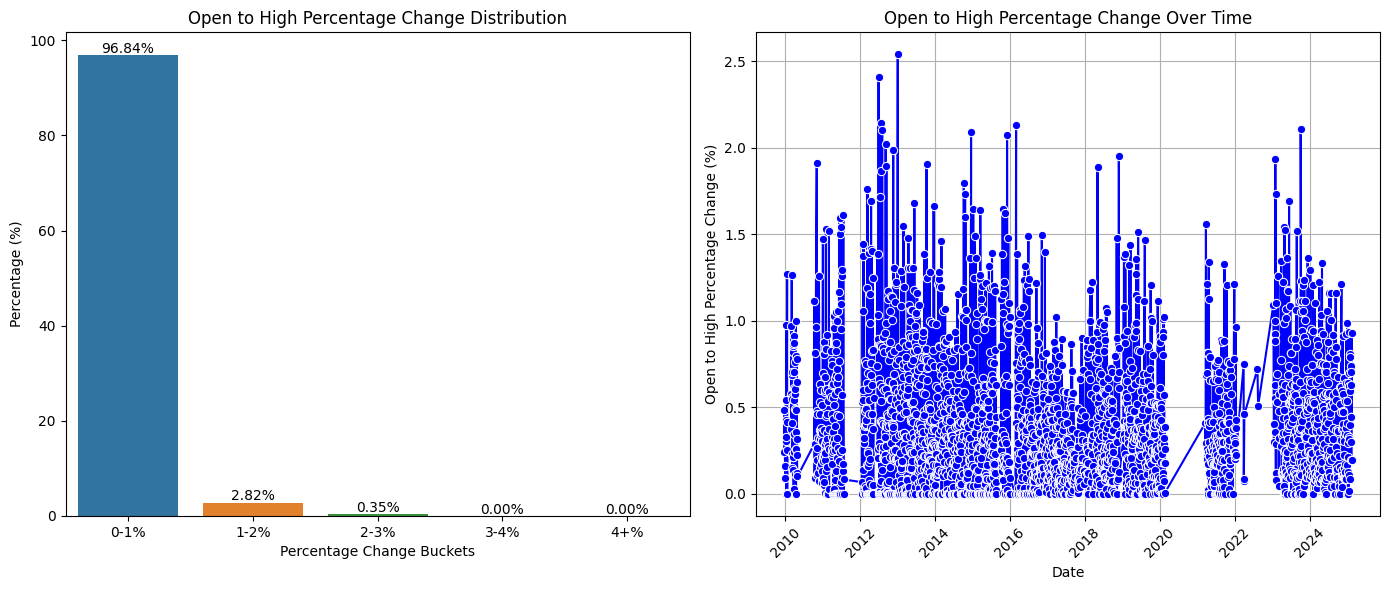

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Defining bucket ranges and labels for Open_to_High_%
bins = [0, 1.3, 2, 3, 4, float("inf")]
labels = ["0-1%", "1-2%", "2-3%", "3-4%", "4+%"]

df = merged_df[(merged_df["open_vix"] < 20) & (merged_df["open_vix"] >= 10)]

bar_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Categorizing Open_to_High_% into buckets
df["Open_to_High_Bucket"] = pd.cut(df["Open_to_High_%"], bins=bins, labels=labels, include_lowest=True)

# Counting occurrences in each bucket
high_bucket_counts = df["Open_to_High_Bucket"].value_counts().sort_index()

# Calculating percentage distribution
total_high = high_bucket_counts.sum()
high_bucket_percentages = (high_bucket_counts / total_high) * 100

# Creating a side-by-side layout for the two graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for Open_to_High_% Distribution
sns.barplot(x=high_bucket_percentages.index, y=high_bucket_percentages.values, palette=bar_colors, ax=axes[0])
axes[0].set_xlabel("Percentage Change Buckets")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_title("Open to High Percentage Change Distribution")

# Show percentage values on bars
for i, v in enumerate(high_bucket_percentages.values):
    axes[0].text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

# Line plot for Open_to_High_% vs Date
sns.lineplot(x=df["date_column"], y=df["Open_to_High_%"], marker="o", color="blue", ax=axes[1])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Open to High Percentage Change (%)")
axes[1].set_title("Open to High Percentage Change Over Time")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and display the charts
plt.tight_layout()
plt.show()


In [38]:
# merged_df[merged_df['Open_to_Close_%'] <= 0]

<ipython-input-53-ee1de7c8106a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Open_to_Close_Bucket"] = pd.cut(df["Open_to_Close_%"], bins=bins, labels=labels, include_lowest=True)
<ipython-input-53-ee1de7c8106a>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=oc_bucket_percentages.index, y=oc_bucket_percentages.values, palette=bar_colors, ax=axes[0])
<ipython-input-53-ee1de7c8106a>:32: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x=oc_bucket_percentages.index, y=oc_bucket_percentages.values, palette=bar_colors, ax=axes[0])


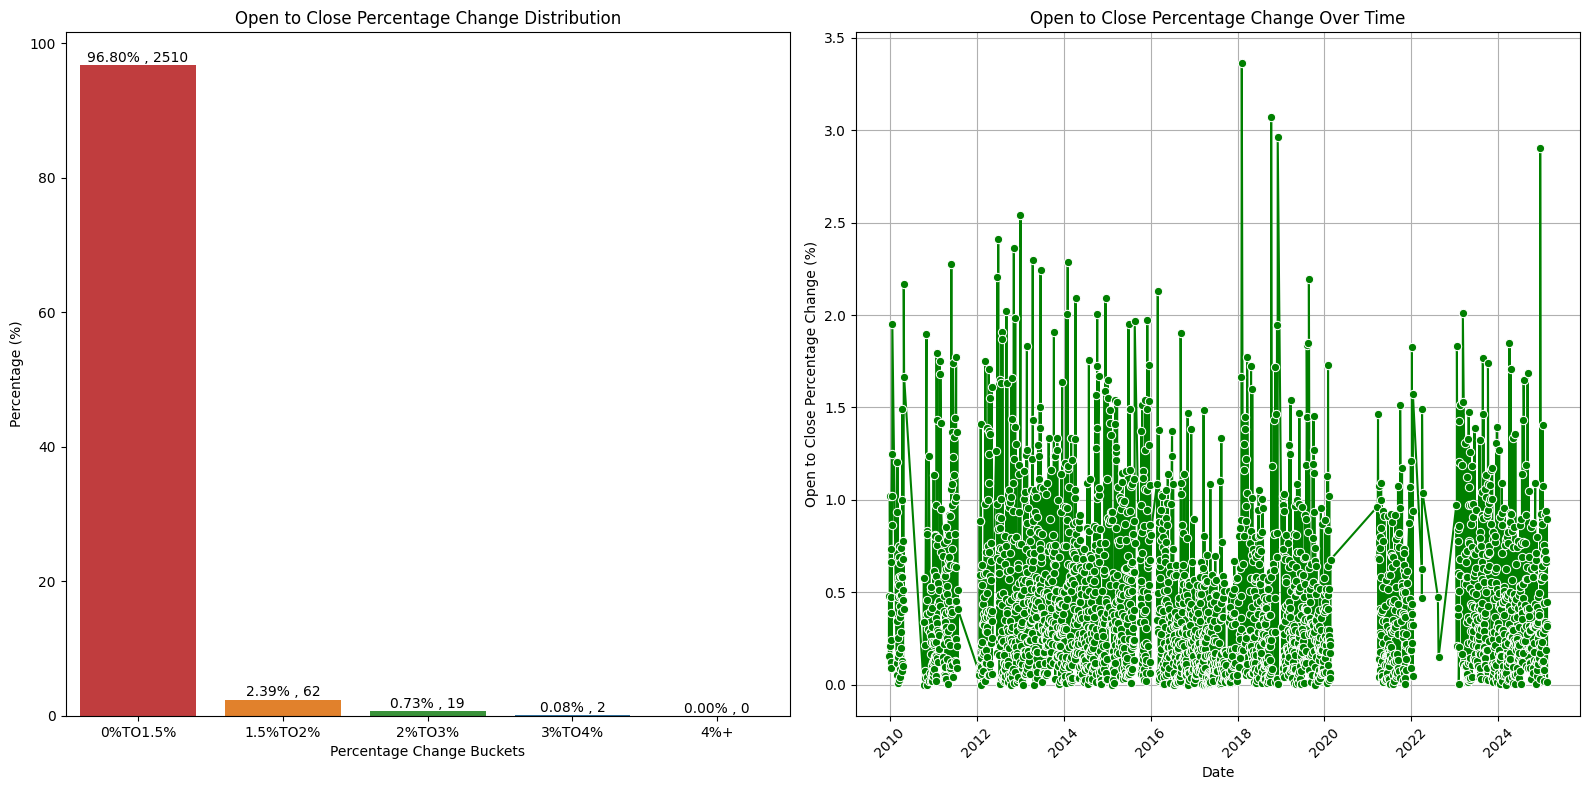

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (Replace with actual data)
# df = pd.read_csv("your_data.csv")  # Load your dataset if not already loaded

# Define bucket ranges and labels for Open_to_Close_%
bins = [-0.00001, 1.5, 2, 3, 4, float("inf")]
labels = ["0%TO1.5%", "1.5%TO2%", "2%TO3%", "3%TO4%", "4%+"]

bar_colors = ["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4", "#9467bd",
              "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# df = merged_df
df = merged_df[(merged_df["open_vix"] < 20) & (merged_df["open_vix"] >= 10)]

# Categorizing Open_to_Close_% into buckets
df["Open_to_Close_Bucket"] = pd.cut(df["Open_to_Close_%"], bins=bins, labels=labels, include_lowest=True)

# Counting occurrences in each bucket
oc_bucket_counts = df["Open_to_Close_Bucket"].value_counts().sort_index()

# Calculating percentage distribution
total_oc = oc_bucket_counts.sum()
oc_bucket_percentages = (oc_bucket_counts / total_oc) * 100

# Creating a side-by-side layout for the two graphs
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Bar plot for Open_to_Close_% Distribution
sns.barplot(x=oc_bucket_percentages.index, y=oc_bucket_percentages.values, palette=bar_colors, ax=axes[0])
axes[0].set_xlabel("Percentage Change Buckets")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_title("Open to Close Percentage Change Distribution")

# Show percentage values on bars
for i, v in enumerate(oc_bucket_percentages.values):
    axes[0].text(i, v + 0.5, f"{v:.2f}% , {oc_bucket_counts[i]}", ha='center', fontsize=10)

# Line plot for Open_to_Close_% vs Date
sns.lineplot(x=df["date_column"], y=df["Open_to_Close_%"], marker="o", color="green", ax=axes[1])
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Open to Close Percentage Change (%)")
axes[1].set_title("Open to Close Percentage Change Over Time")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout and display the charts
plt.tight_layout()
plt.show()


In [40]:
df["Open_to_Close_Bucket"] = pd.cut(df["Open_to_Close_%"], bins=bins, labels=labels, include_lowest=True)

# Counting occurrences in each bucket
oc_bucket_counts = df["Open_to_Close_Bucket"].value_counts().sort_index()

<ipython-input-40-28bfc3d73941>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Open_to_Close_Bucket"] = pd.cut(df["Open_to_Close_%"], bins=bins, labels=labels, include_lowest=True)


In [41]:
pd.cut(df["Open_to_Close_%"], bins=bins).value_counts()

,count
Open_to_Close_%,
"(-0.01, 1.0]",2313
"(1.0, 2.0]",259
"(2.0, 3.0]",19
"(3.0, 4.0]",2
"(4.0, inf]",0


In [42]:
df[df["Open_to_Close_%"] <= 0].shape

(2, 17)